# Introduction

This project analyzes data from on-line dating application OKCupid. In recent years, there has been a massive rise in the usage of dating apps to find love. Many of these apps use sophisticated data science techniques to recommend possible matches to users and to optimize the user experience. These apps give us access to a wealth of information that we've never had before about how different people experience romance.

The goal of this project is to scope, prep, analyze, and create a machine learning model to solve a question.

## Import Python Modules


In [23]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [6,6]
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

## Loading the Data

In [24]:
profiles = pd.read_csv("profiles.csv",encoding = 'utf-8')

In [25]:
profiles.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [26]:
profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

In [27]:
profiles.last_online.head()

0    2012-06-28-20-30
1    2012-06-29-21-41
2    2012-06-27-09-10
3    2012-06-28-14-22
4    2012-06-27-21-26
Name: last_online, dtype: object

In [28]:
list(profiles.columns)

['age',
 'body_type',
 'diet',
 'drinks',
 'drugs',
 'education',
 'essay0',
 'essay1',
 'essay2',
 'essay3',
 'essay4',
 'essay5',
 'essay6',
 'essay7',
 'essay8',
 'essay9',
 'ethnicity',
 'height',
 'income',
 'job',
 'last_online',
 'location',
 'offspring',
 'orientation',
 'pets',
 'religion',
 'sex',
 'sign',
 'smokes',
 'speaks',
 'status']

## Explore the Data

In [29]:
print("nnumber of catogries : ",profiles.sign.nunique())

nnumber of catogries :  48


In [30]:
print("Catogries : ",profiles.sign.unique())

Catogries :  ['gemini' 'cancer' 'pisces but it doesn&rsquo;t matter' 'pisces'
 'aquarius' 'taurus' 'virgo' 'sagittarius'
 'gemini but it doesn&rsquo;t matter' 'cancer but it doesn&rsquo;t matter'
 'leo but it doesn&rsquo;t matter' nan
 'aquarius but it doesn&rsquo;t matter'
 'aries and it&rsquo;s fun to think about'
 'libra but it doesn&rsquo;t matter'
 'pisces and it&rsquo;s fun to think about' 'libra'
 'taurus but it doesn&rsquo;t matter'
 'sagittarius but it doesn&rsquo;t matter' 'scorpio and it matters a lot'
 'gemini and it&rsquo;s fun to think about'
 'leo and it&rsquo;s fun to think about'
 'cancer and it&rsquo;s fun to think about'
 'libra and it&rsquo;s fun to think about'
 'aquarius and it&rsquo;s fun to think about'
 'virgo but it doesn&rsquo;t matter'
 'scorpio and it&rsquo;s fun to think about'
 'capricorn but it doesn&rsquo;t matter' 'scorpio'
 'capricorn and it&rsquo;s fun to think about' 'leo'
 'aries but it doesn&rsquo;t matter' 'aries'
 'scorpio but it doesn&rsquo;t m

In [31]:
profiles.sign

0                                          gemini
1                                          cancer
2              pisces but it doesn&rsquo;t matter
3                                          pisces
4                                        aquarius
                           ...                   
59941    cancer and it&rsquo;s fun to think about
59942             leo but it doesn&rsquo;t matter
59943     sagittarius but it doesn&rsquo;t matter
59944       leo and it&rsquo;s fun to think about
59945    gemini and it&rsquo;s fun to think about
Name: sign, Length: 59946, dtype: object

In [32]:
profiles.sign.str.split()

0                                                [gemini]
1                                                [cancer]
2                [pisces, but, it, doesn&rsquo;t, matter]
3                                                [pisces]
4                                              [aquarius]
                               ...                       
59941    [cancer, and, it&rsquo;s, fun, to, think, about]
59942               [leo, but, it, doesn&rsquo;t, matter]
59943       [sagittarius, but, it, doesn&rsquo;t, matter]
59944       [leo, and, it&rsquo;s, fun, to, think, about]
59945    [gemini, and, it&rsquo;s, fun, to, think, about]
Name: sign, Length: 59946, dtype: object

In [33]:
profiles['signcleaned'] = profiles.sign.str.split().str.get(0)

In [34]:
profiles['signcleaned'].tail()

59941         cancer
59942            leo
59943    sagittarius
59944            leo
59945         gemini
Name: signcleaned, dtype: object

In [35]:
print("n_number of catogries : ",profiles.signcleaned.nunique())

n_number of catogries :  12


In [36]:
print("catogries : ",  list(profiles.signcleaned.unique()))

catogries :  ['gemini', 'cancer', 'pisces', 'aquarius', 'taurus', 'virgo', 'sagittarius', 'leo', nan, 'aries', 'libra', 'scorpio', 'capricorn']


In [37]:
profiles.signcleaned.value_counts()

leo            4374
gemini         4310
libra          4207
cancer         4206
virgo          4141
taurus         4140
scorpio        4134
aries          3989
pisces         3946
sagittarius    3942
aquarius       3928
capricorn      3573
Name: signcleaned, dtype: int64

## Continous Variables  
#### age

The next plot shows the distribution of age in the group. It seems that most users are in their late 20s to early 30s.

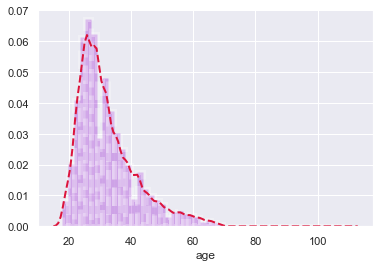

In [38]:
sns.set()
sns.distplot(profiles['age'],norm_hist = "True",hist_kws = {'color':'#8e00ce',
                       'linewidth':5, 'linestyle':'--', 'alpha':0.3},
            kde_kws = {'color':'#DC143C', 
                       'linewidth':2, 'linestyle':'--', 'alpha':1});

#### Height

The next plot shows the height variable, most people look like they are between 5 feet tall and 6.5 feet tall.

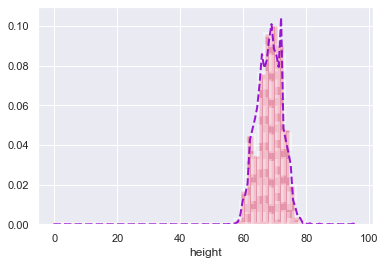

In [39]:
sns.distplot(profiles["height"],norm_hist="True",hist_kws = {'color':'#DC143C',
                       'linewidth':5, 'linestyle':'--', 'alpha':0.4},
            kde_kws = {'color':'#8e00ce', 
                       'linewidth':2, 'linestyle':'--', 'alpha':0.9});

# Discrete variable

#### Sex

Previously it was identified that there are more males in the data, and it seems that there are ~35,000 men to ~25,000 women.

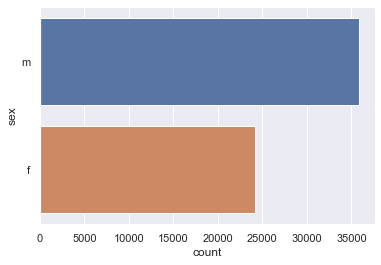

In [54]:
sns.countplot(data=profiles, y="sex");

#### Body Type

The next chart shows the body type variable, and it seems that most users will describe themselves as average, fit, or athletic.

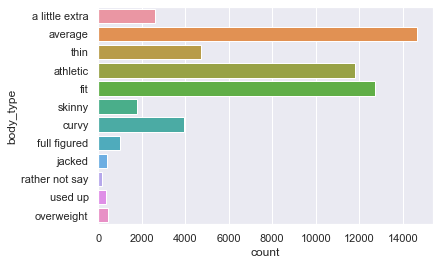

In [55]:
sns.countplot(data=profiles, y="body_type");

The next chart shows the break down of body type by gender and it seems that some of the body type descriptions are highly gendered. For example "curvy" and "full figured" are highly female descriptions, while males use "a little extra", and "overweight" more often.

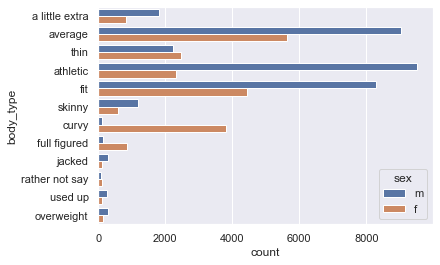

In [56]:
sns.countplot(data=profiles, y="body_type", hue = "sex");

#### Diet

Here is a chart of the dietary information for users. Most user eat "mostly anything", followed by "anything", and "strictly anything", being open-minded seems to be a popular signal to potential partners. 

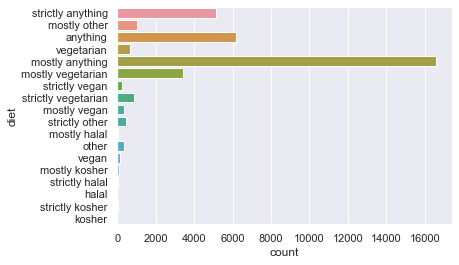

In [57]:
sns.countplot(data=profiles, y="diet");

#### Drinks

The next plot shows that the majority of the users drink "socially", then "rarely" and "often". 

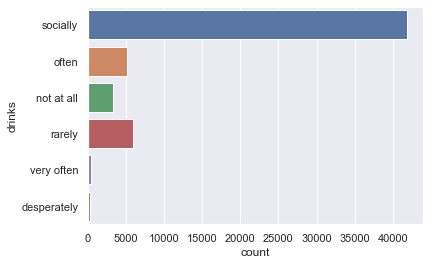

In [58]:
sns.countplot(data=profiles, y="drinks");

#### Drugs

The vast majority of users "never" use drugs. It's good to to see.

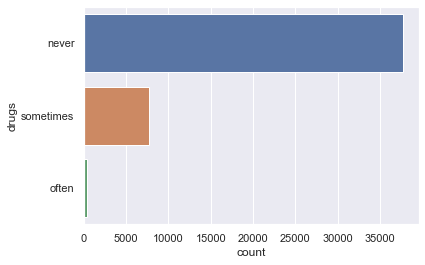

In [60]:
sns.countplot(data=profiles, y="drugs");

#### Education

Below you can see the majority of users are graduate from college/university followed by masters programs and those working on college/university. Interestingly space camp related options are fairly a popular options.

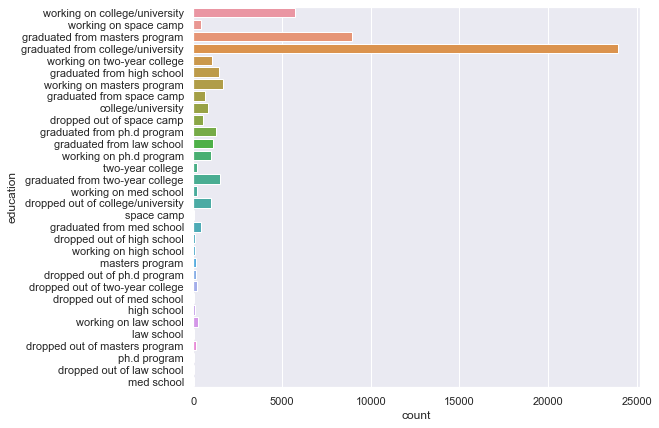

In [61]:
plt.figure(figsize=(8,7))

sns.countplot(data=profiles, y="education");

#### Jobs

Most users don't fit into the categories provided, but there are a fair share of students, artists, tech, and business folks. 

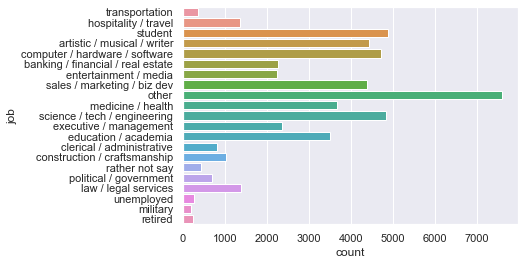

In [62]:
sns.countplot(data=profiles, y="job");

#### Offspring

The data suggest that most users do not have kids. 

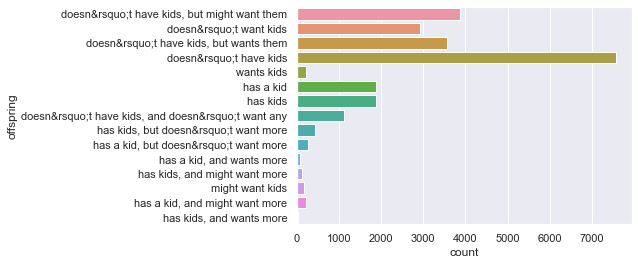

In [63]:
sns.countplot(data=profiles, y="offspring");

#### Orientation

The majority of users are straight.

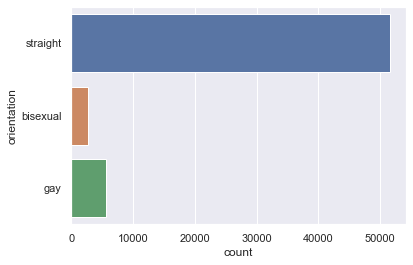

In [64]:
sns.countplot(data=profiles, y="orientation");

interestingly the majority of bisexual users re female. 

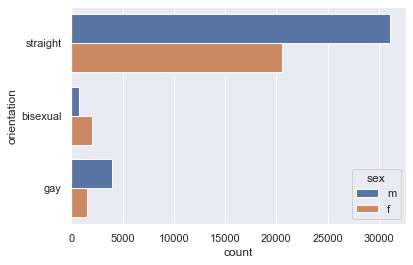

In [65]:
sns.countplot(data=profiles, y="orientation", hue = "sex");

#### Pets

The chart shows that most users like or has dogs.

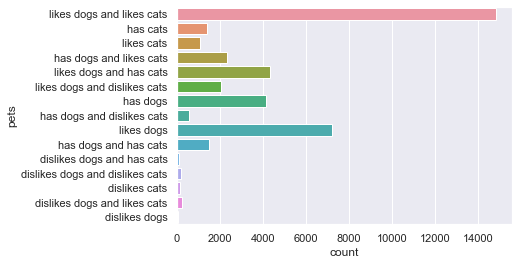

In [66]:
sns.countplot(data=profiles, y="pets");

#### Religion

Religion was similar to sign where there are a lot of qualifiers.

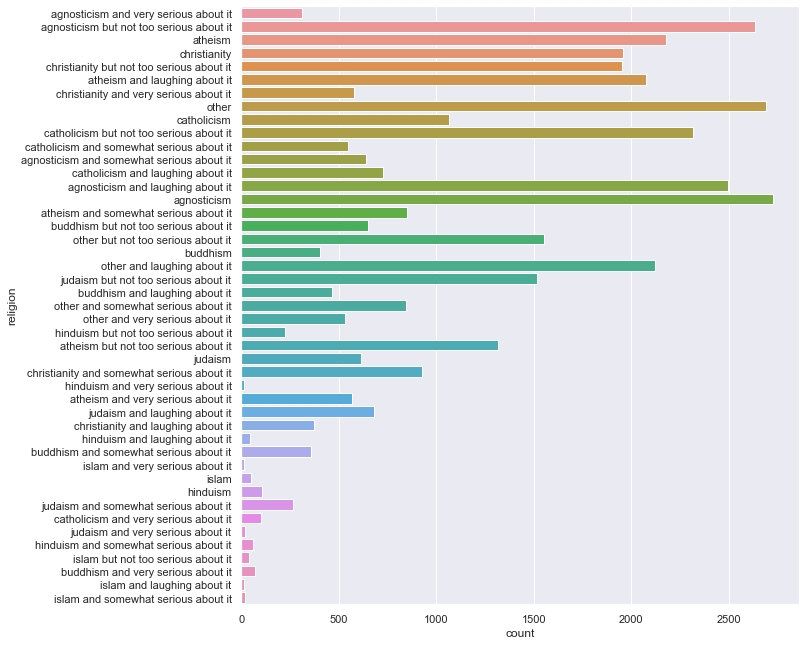

In [67]:
plt.figure(figsize=(10,11))
sns.countplot(data=profiles, y="religion");

religion was cleaned to take the first word and distilled down to 9 groups. The majority was not very religious identifying as agnostic, other, or atheists. 

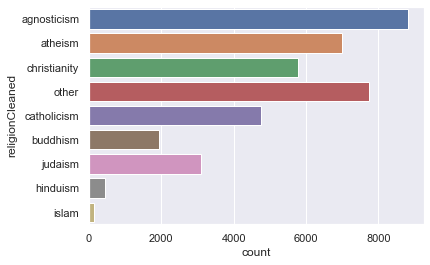

In [68]:
profiles['religionCleaned'] = profiles.religion.str.split().str.get(0)
sns.countplot(data=profiles, y="religionCleaned");

#### Signs

Here are the astrological signs of the users. There are mainly evenly distributed with Capricorns being the rarest and Leos being the most common.

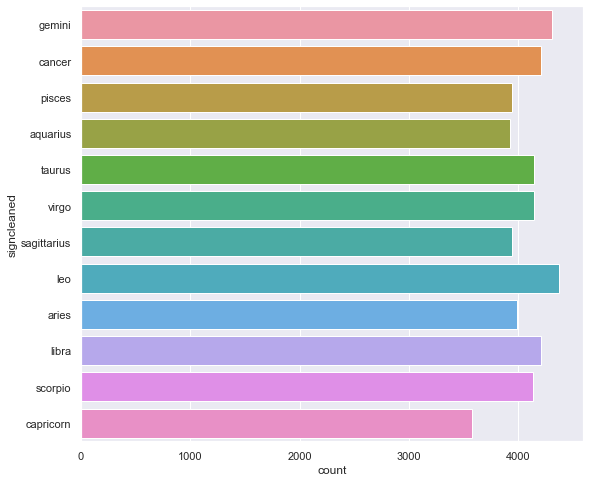

In [73]:
plt.figure(figsize=(9,8))
sns.countplot(data=profiles, y="signcleaned");

#### Smoking

Similarly for drugs the majority of users chose "no" for smoking.

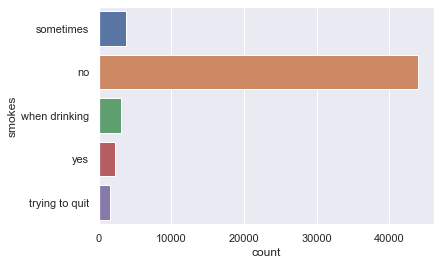

In [74]:
sns.countplot(data=profiles, y="smokes");

#### Status

The relationship status for a dating website is fairly predictable. One would assume that most people are single and available which is reflected in the data.

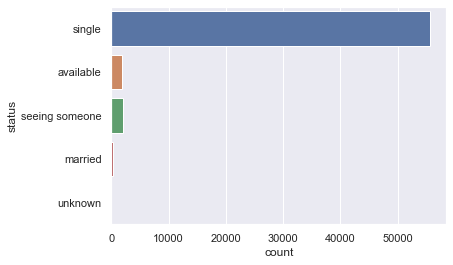

In [75]:
sns.countplot(data=profiles, y="status");

### Data Preperation
#### Missing Data

Missing data is often not handled by machine learning algorithms well and have to be checked so they may need to be imputed or removed. It seems that many of the columns do have missing values. 

In [76]:
profiles.isnull().sum()

age                    0
body_type           5296
diet               24395
drinks              2985
drugs              14080
education           6628
essay0              5488
essay1              7572
essay2              9638
essay3             11476
essay4             10537
essay5             10850
essay6             13771
essay7             12451
essay8             19225
essay9             12603
ethnicity           5680
height                 3
income                 0
job                 8198
last_online            0
location               0
offspring          35561
orientation            0
pets               19921
religion           20226
sex                    0
sign               11056
smokes              5512
speaks                50
status                 0
signcleaned        11056
religionCleaned    20226
dtype: int64

#### Preprocessing 

Preparing the data for modeling is important since it can speed up the process and produce better models. As the adage goes, "garbage in garbage out" so we want to make sure the data we are inputing into our modelling step is good enough to share with others.

In [80]:
cols = ['body_type', 'diet', 'orientation', 'pets', 'religionCleaned',
       'sex', 'job', 'signcleaned']
df = profiles[cols].dropna()

#### Dummy Variables

In this next step, dummy variables are created to deal with the categorical variables. Dummy variables will turn the categories per variable into its own binary identifier. The data now has 81 columns to predict signs. 

In [81]:
for col in cols[:-1]:
    df = pd.get_dummies(df, columns=[col], prefix = [col])

In [82]:
df.head()

,signcleaned,body_type_a little extra,body_type_athletic,body_type_average,body_type_curvy,body_type_fit,body_type_full figured,body_type_jacked,body_type_overweight,body_type_rather not say,...,job_military,job_other,job_political / government,job_rather not say,job_retired,job_sales / marketing / biz dev,job_science / tech / engineering,job_student,job_transportation,job_unemployed
0,gemini,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,cancer,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,taurus,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,sagittarius,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,cancer,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


#### Label Imbalance 

An imbalance in the prediction label needs to be checked. This is important since it's a multi-class problem where two or more outcomes can be had. An imbalance in a response variable is bad since it means that some labels only occur a few times. This is an issue for machine learning algorithms if there are not enough data to train with which will give bad predictions. 

In the given dataset, we observe that the counts of all the zodiac signs are more or less equal (i.e., without large deviations). Hence, we do not have to worry about imbalances and trying to address this problem.

In [86]:
df.signcleaned.value_counts()

leo            1516
gemini         1496
cancer         1457
virgo          1451
taurus         1390
scorpio        1356
libra          1354
pisces         1334
aries          1328
sagittarius    1312
aquarius       1262
capricorn      1197
Name: signcleaned, dtype: int64

#### Splitting Data

Next the data needs to be split into train and validation sets. In this split 25% of the data is reserved for the final validation, while 75% is kept for training the model. 

In [87]:
col_length = len(df.columns)

In [88]:
X = df.iloc[:, 1:col_length]
Y = df.iloc[:, 0:1]


In [90]:
from sklearn.model_selection import train_test_split 
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.25, random_state = 0)


In [91]:
Y_train = Y_train.to_numpy().ravel()
Y_val = Y_val.to_numpy().ravel()
Y_train

array(['libra', 'capricorn', 'aries', ..., 'gemini', 'leo', 'cancer'],
      dtype=object)

In [92]:
Y_val

array(['cancer', 'aries', 'pisces', ..., 'pisces', 'leo', 'gemini'],
      dtype=object)

### Prediction 

#### model building 

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

#### Logistic Regression

In [100]:
model = LogisticRegression(multi_class="multinomial").fit(X_train,Y_train)

In [102]:
predictions = model.predict(X_train)
predictions

array(['virgo', 'virgo', 'cancer', ..., 'aquarius', 'gemini', 'leo'],
      dtype=object)

The final accuracy of the logistic regression model is 12% which is terrible considering a random guess should result in being correct ~8% of the time (1/12).

In [104]:
from sklearn.metrics import classification_report
print(classification_report(Y_train, predictions))

              precision    recall  f1-score   support

    aquarius       0.13      0.07      0.09       968
       aries       0.12      0.10      0.11       983
      cancer       0.13      0.24      0.17      1129
   capricorn       0.14      0.05      0.07       882
      gemini       0.12      0.15      0.13      1130
         leo       0.12      0.19      0.15      1121
       libra       0.11      0.08      0.09      1028
      pisces       0.11      0.09      0.10       997
 sagittarius       0.13      0.09      0.11       965
     scorpio       0.14      0.05      0.08      1001
      taurus       0.13      0.12      0.12      1045
       virgo       0.12      0.21      0.15      1090

    accuracy                           0.12     12339
   macro avg       0.12      0.12      0.11     12339
weighted avg       0.12      0.12      0.12     12339



#### K Nearest Neighbor

The next models is the `KNeighborsClassifier` which will take 20 of it's neighbors to predict the signs. The default value for `n_neighbors` is 5 which was kept. This number can be tuned later on if needed. This model had a 33% accuracy which is a good sign.


In [105]:
knn_model = KNeighborsClassifier(n_neighbors = 5).fit(X_train, Y_train)
knn_predictions = knn_model.predict(X_train)

In [106]:
print(classification_report(Y_train, knn_predictions))

              precision    recall  f1-score   support

    aquarius       0.25      0.65      0.36       968
       aries       0.25      0.51      0.34       983
      cancer       0.29      0.43      0.35      1129
   capricorn       0.33      0.34      0.33       882
      gemini       0.37      0.32      0.35      1130
         leo       0.39      0.28      0.32      1121
       libra       0.39      0.23      0.29      1028
      pisces       0.39      0.25      0.31       997
 sagittarius       0.45      0.18      0.26       965
     scorpio       0.42      0.20      0.28      1001
      taurus       0.43      0.25      0.31      1045
       virgo       0.42      0.27      0.33      1090

    accuracy                           0.33     12339
   macro avg       0.36      0.33      0.32     12339
weighted avg       0.37      0.33      0.32     12339



#### Decision Trees

The last model is the decision tree, the default `max_depth` is `none` which means that it will "If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.". The results are very promising because it has a 78% accuracy with this model.

In [107]:
cart_model = DecisionTreeClassifier().fit(X_train, Y_train) 
cart_predictions = cart_model.predict(X_train) 

In [108]:
print(classification_report(Y_train, cart_predictions))

              precision    recall  f1-score   support

    aquarius       0.67      0.94      0.78       968
       aries       0.66      0.88      0.75       983
      cancer       0.71      0.86      0.77      1129
   capricorn       0.74      0.84      0.79       882
      gemini       0.78      0.79      0.79      1130
         leo       0.80      0.80      0.80      1121
       libra       0.79      0.76      0.78      1028
      pisces       0.82      0.74      0.78       997
 sagittarius       0.91      0.70      0.79       965
     scorpio       0.89      0.71      0.79      1001
      taurus       0.93      0.70      0.80      1045
       virgo       0.94      0.67      0.78      1090

    accuracy                           0.78     12339
   macro avg       0.80      0.78      0.78     12339
weighted avg       0.80      0.78      0.78     12339



Below is a confusion matrix of the results with the true values on the y axis and predicted values along the x axis. Since the diagonals are lighter in color and have higher numbers, the accuracy is going to be high since those are the True Positives.

In [109]:
from sklearn.metrics import confusion_matrix 
cart_cm = confusion_matrix(Y_train, cart_predictions)
cart_labels = cart_model.classes_

In [110]:
cart_cm

array([[911,   8,   7,   3,   2,  10,   8,   7,   4,   5,   1,   2],
       [ 51, 864,  12,   4,   5,   8,  10,   9,   2,   8,   6,   4],
       [ 51,  47, 970,   6,   6,  13,   9,   9,   2,   5,   5,   6],
       [ 33,  34,  34, 744,   4,   5,   8,   9,   3,   2,   1,   5],
       [ 45,  52,  53,  42, 893,   7,   9,  15,   2,   7,   2,   3],
       [ 37,  38,  43,  32,  37, 898,   6,  10,   2,   5,   4,   9],
       [ 40,  48,  47,  23,  29,  31, 785,   8,   2,   3,   5,   7],
       [ 44,  32,  45,  28,  36,  23,  36, 736,   2,   7,   4,   4],
       [ 41,  48,  40,  26,  32,  35,  29,  21, 678,   6,   6,   3],
       [ 34,  53,  39,  30,  29,  35,  25,  25,  15, 710,   3,   3],
       [ 31,  41,  39,  39,  30,  31,  36,  28,  16,  21, 731,   2],
       [ 48,  44,  46,  31,  37,  31,  34,  25,  20,  23,  19, 732]],
      dtype=int64)

In [111]:
cart_labels

array(['aquarius', 'aries', 'cancer', 'capricorn', 'gemini', 'leo',
       'libra', 'pisces', 'sagittarius', 'scorpio', 'taurus', 'virgo'],
      dtype=object)

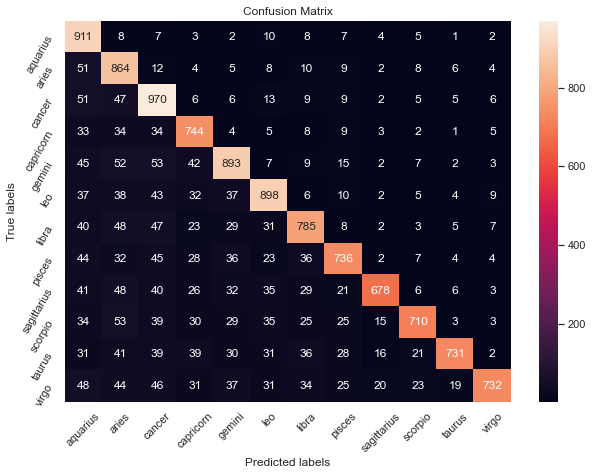

In [118]:
plt.figure(figsize=(10,7))

ax= plt.subplot()
sns.heatmap(cart_cm, annot=True, ax = ax,fmt="d");


ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
ax.yaxis.set_tick_params(rotation=60)
ax.xaxis.set_tick_params(rotation=45)

ax.xaxis.set_ticklabels(cart_labels); 
ax.yaxis.set_ticklabels(cart_labels);

Going back to the model, a quick analysis will show that this tree model has a depth of 49 branches, which will probably not generalize to another dataset. In this case this model has been "overfit" for this data. 

In [119]:
cart_model.get_depth()

49

To make a point, a five fold cross validation is created with the same data. The results are worse than the KNN and about the Logistic Regression algorithms. the baseline was ~9%

In [120]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=5, shuffle=True, random_state=0)
results = cross_val_score(cart_model, X_train, Y_train, cv=kfold, scoring='accuracy')

print(results)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

[0.08387358 0.09683955 0.09076175 0.09602917 0.09241994]
Baseline: 9.20% (0.46%)


The decision tree model will be made it again, but with a `max_depth` of 20 to stop the algorithm from reaching the stopping point. The new accuracy rate of ~41% is worse than the first iteration, but slightly better than the KNN model. 

In [121]:
cart_model20 = DecisionTreeClassifier(max_depth = 20).fit(X_train, Y_train) 
cart_predictions20 = cart_model20.predict(X_train) 

In [122]:
cart_predictions20

array(['virgo', 'taurus', 'aries', ..., 'gemini', 'leo', 'virgo'],
      dtype=object)

In [123]:
print(classification_report(Y_train, cart_predictions20))

              precision    recall  f1-score   support

    aquarius       0.57      0.40      0.47       968
       aries       0.43      0.43      0.43       983
      cancer       0.37      0.50      0.43      1129
   capricorn       0.53      0.42      0.47       882
      gemini       0.40      0.44      0.42      1130
         leo       0.36      0.48      0.41      1121
       libra       0.29      0.42      0.34      1028
      pisces       0.66      0.33      0.44       997
 sagittarius       0.65      0.33      0.44       965
     scorpio       0.35      0.39      0.37      1001
      taurus       0.53      0.38      0.44      1045
       virgo       0.32      0.40      0.35      1090

    accuracy                           0.41     12339
   macro avg       0.46      0.41      0.42     12339
weighted avg       0.45      0.41      0.42     12339



If we check again with cross validation, the new model is still averaging ~8% which is not very good. 

In [124]:
results20 = cross_val_score(cart_model20, X_train, Y_train, cv=kfold, scoring='accuracy')

print(results20)
print("Baseline: %.2f%% (%.2f%%)" % (results20.mean()*100, results.std()*100))

[0.07576985 0.08549433 0.0863047  0.08184765 0.09282529]
Baseline: 8.44% (0.46%)


#### Final Model

So it seems that the `knn_model` might be the best model for OkCupid to use when users don't have their signs listed on their user profile. By using the hold out or validation set, we get ~8% accuracy which is not very good. 

In [125]:
knn_predictionsVal = knn_model.predict(X_val) 
print(classification_report(Y_val, knn_predictionsVal))

              precision    recall  f1-score   support

    aquarius       0.08      0.22      0.12       294
       aries       0.09      0.18      0.12       345
      cancer       0.09      0.15      0.11       328
   capricorn       0.06      0.06      0.06       315
      gemini       0.08      0.06      0.07       366
         leo       0.10      0.07      0.08       395
       libra       0.10      0.06      0.08       326
      pisces       0.07      0.05      0.06       337
 sagittarius       0.08      0.03      0.05       347
     scorpio       0.08      0.04      0.05       355
      taurus       0.07      0.04      0.05       345
       virgo       0.08      0.05      0.06       361

    accuracy                           0.08      4114
   macro avg       0.08      0.08      0.08      4114
weighted avg       0.08      0.08      0.07      4114



In the confusion matrix, it becomes clear that Cancer, Gemini, Leo, and Virgo was predicted most often, but was not super accurate since the vertical color band represents even distributed guesses mostly wrong and some correct. 

In [126]:
final_cm = confusion_matrix(Y_val, knn_predictionsVal)
knn_labels = knn_model.classes_


In [127]:
final_cm

array([[66, 56, 34, 18, 12, 17, 12, 10, 21, 11, 23, 14],
       [65, 62, 43, 28, 27, 21, 20, 21, 11, 18, 17, 12],
       [65, 47, 50, 33, 28, 27, 17, 15, 10, 16, 10, 10],
       [67, 50, 40, 20, 17, 21, 22, 17, 12, 16, 17, 16],
       [70, 63, 51, 35, 22, 25, 12, 17, 13, 11, 21, 26],
       [71, 71, 52, 35, 24, 26, 21, 23, 14, 10, 23, 25],
       [73, 47, 50, 18, 31, 17, 21, 16, 11, 10, 10, 22],
       [70, 55, 36, 27, 34, 18, 14, 16, 11, 13, 27, 16],
       [63, 62, 49, 31, 17, 23, 14, 19, 11, 13, 21, 24],
       [76, 62, 53, 26, 23, 25, 15, 28,  5, 13, 15, 14],
       [74, 49, 52, 23, 26, 24, 17, 24,  9, 13, 15, 19],
       [76, 51, 61, 36, 32, 22, 18, 15,  9, 13, 10, 18]], dtype=int64)

In [128]:
knn_labels

array(['aquarius', 'aries', 'cancer', 'capricorn', 'gemini', 'leo',
       'libra', 'pisces', 'sagittarius', 'scorpio', 'taurus', 'virgo'],
      dtype=object)

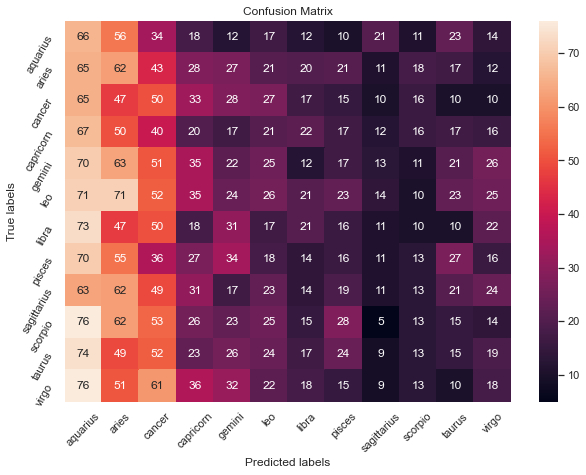

In [132]:
plt.figure(figsize=(10,7))

ax= plt.subplot()
sns.heatmap(final_cm, annot=True, ax = ax, fmt="d");

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
ax.yaxis.set_tick_params(rotation=60)
ax.xaxis.set_tick_params(rotation=45)

ax.xaxis.set_ticklabels(knn_labels); 
ax.yaxis.set_ticklabels(knn_labels);

#### General Comments

In this project machine learning was used to predict the astrological signs of OkCupid users. This is an important feature since many people believe in astrology and matches between compatible star signs. If users don't input their signs, an algorithmic solution could have generated a sign to impute missing data when making matches.

Alas, the final selected algorithm did no better than basic guessing.
